In [1]:
import numpy as np
import scipy as sp
import os
import cv2
import sys
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir=['./train/shirt/','./test/shirt/','./train/not_a_shirt/','./test/not_a_shirt/']

In [3]:
channels=3
image_size=28

def make_array(dir):
    count=0;
    for folder in dir:
        files=os.listdir(folder)
        for file in files:
            count=count+1;
    
    dataset=np.ndarray(shape=(count,image_size,image_size,channels), dtype=np.float32)
    labels=np.ndarray(shape=(count), dtype=np.int32)
    return dataset,labels

In [13]:
dataset,labels=make_array(dir)
num_cloth=0
pixel_depth=255.0

for i,folder in enumerate(dir):
    files=os.listdir(folder)
    if (i<2):
        category=0
    else:
        category=1
    for file in files:
        c=folder+file
        img=cv2.imread(c)
        img=cv2.resize(img,(28,28))
        img= img.astype(np.float32)
        img= (np.array(img).astype(float) - 
                    pixel_depth / 2) / pixel_depth
        dataset[num_cloth, :, :, :]=img
        labels[num_cloth]=category
        num_cloth=num_cloth+1
dataset=dataset[0:num_cloth, :, :, :]
labels=labels[0:num_cloth]

In [22]:
dataset=np.array(dataset)
labels=np.array(labels)
test=dataset[61,:,:,:]
test_title=labels[61]

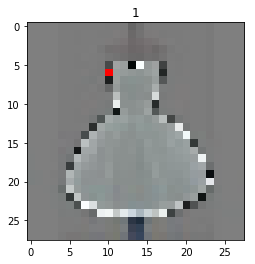

In [23]:
plt.imshow(test)
plt.title(test_title)